### <font color='darkred'> HW4_1

1. Compute Adj $R^2$, AIC and BIC for each of your five regression models in HW2
    
    * Remember that, after running a regression using statsmodels, you can access the AIC (or BIC or Adj $R^2$) of the regression by typing "$***$.aic" (or "$***$.bic" or "$***$.rsquared_adj") where $***$ is the name of the variable containing the regression result 

    
2. Draw three graghs for the three criteria like Figure 6.2 on page 211 of the textbook 
    
    * You can use any types of figure from "matplotlib.pyplot"
    * X-axis may be defined as "number of predictors" or "model number" (set by you)
    * Add a mark or anything onto each graph that indicates the selected model from each criterion 

In [2]:
# p54 of textbook has def
import os
import pandas as pd
os.chdir('')

raw0 = pd.read_csv('College.csv')

In [3]:
# Change the column names
raw0.rename(columns = {'perc.alumni':'palumni'}, inplace = True)
raw0.rename(columns = {'Grad.Rate':'gradrate'}, inplace = True)
raw0.rename(columns = {'Room.Board':'roomboard'}, inplace = True)
raw0.rename(columns = {'F.Undergrad':'fullundergrad'}, inplace = True)
raw0.rename(columns = {'P.Undergrad':'partundergrad'}, inplace = True)
raw0.rename(columns = {'S.F.Ratio':'sfratio'}, inplace = True)

In [4]:
# Import statsmodels.formula.api
import statsmodels.formula.api as smf

Reg=[0,1,2,3,4]
Reg[0] = smf.ols('palumni ~ Private + Accept + Enroll + Top10perc + Personal + roomboard + gradrate + PhD + Outstate + sfratio  + fullundergrad + partundergrad + Apps  + Books + Expend', data=raw0).fit()
Reg[1] = smf.ols('palumni ~ Private + Accept + Enroll + Top10perc + Personal + roomboard + gradrate + PhD + Outstate + sfratio + fullundergrad + partundergrad', data=raw0).fit()
Reg[2] = smf.ols('palumni ~ Private + Accept + Enroll + Top10perc + Personal + roomboard + gradrate + PhD + Outstate + sfratio', data=raw0).fit()
Reg[3] = smf.ols('palumni ~ Private + Accept + Enroll  + Top10perc + gradrate + PhD + Outstate + sfratio + Outstate:Private', data=raw0).fit()
Reg[4] = smf.ols('palumni ~ Private + Top10perc + gradrate +PhD + Outstate + sfratio + Outstate:Private + Accept:Enroll  ', data=raw0).fit()


In [5]:
aic = [0,1,2,3,4]
bic = [0,1,2,3,4]
arsquared = [0,1,2,3,4]
for i in range(0,5):
    
    aic[i] = Reg[i].aic
    bic[i] = Reg[i].bic
    arsquared[i]= Reg[i].rsquared_adj
print("AIC = ", aic)
print("BIC = ", bic)
print("Adjusted R-squared = ", arsquared)

AIC =  [5679.236011522584, 5674.184727635438, 5671.726193201456, 5694.763723430776, 5716.252926886784]
BIC =  [5753.723057128466, 5734.705452190217, 5722.9360370555005, 5741.318126934452, 5758.151890040092]
Adjusted R-squared =  [0.44185708344359953, 0.4433695136766196, 0.4437203654843829, 0.4262522673280892, 0.4094126720226714]


In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [7]:

x=[15,12,10,9,8]


Text(8.5, 0.442, 'Model 3')

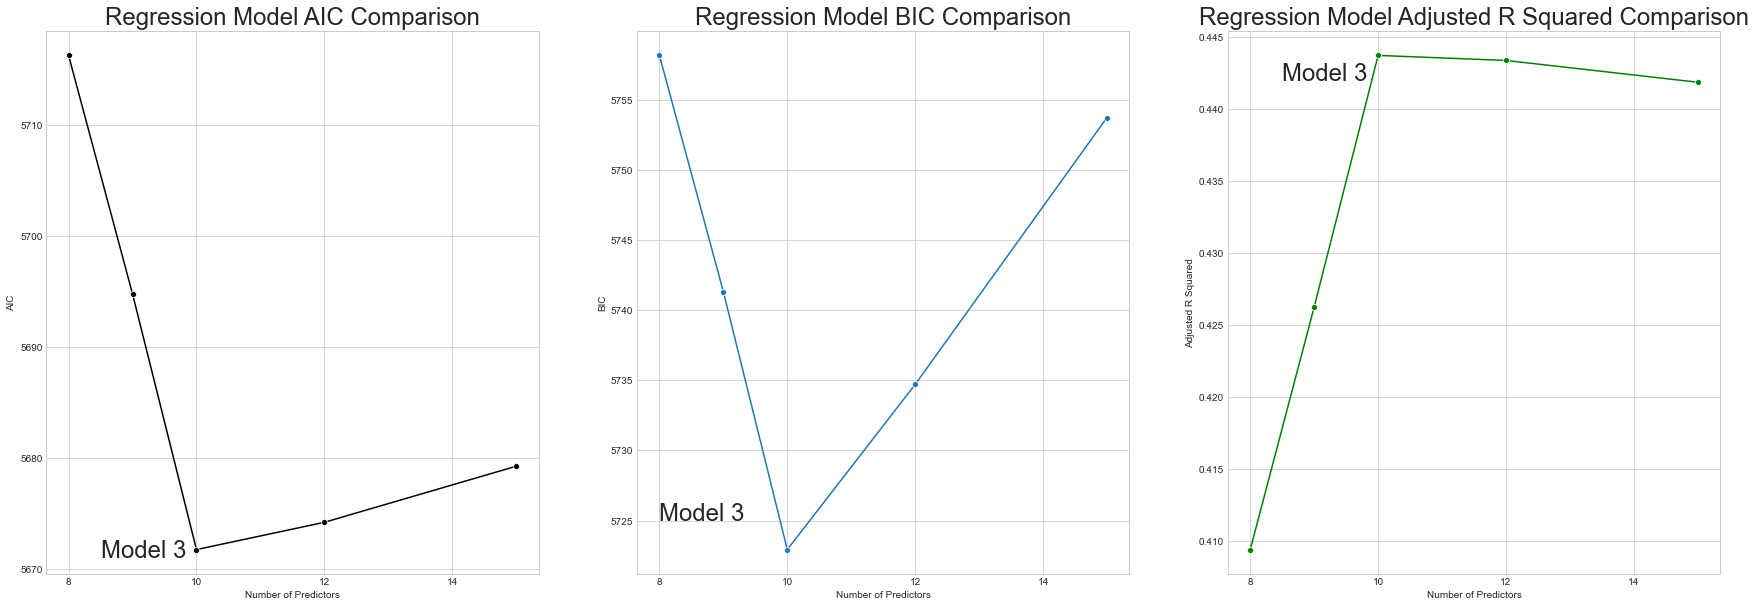

In [8]:
import seaborn as sns
fig, (axAIC, axBIC, axRS) = plt.subplots(1,3, figsize=(30,10))
sns.set(font_scale=2)
sns.lineplot(x = x, y=aic, ax=axAIC, marker = "o", color = 'black').set(title = "Regression Model AIC Comparison")
sns.lineplot(x = x, y=bic, ax=axBIC, marker = "o").set(title = "Regression Model BIC Comparison")
sns.lineplot(x = x, y=arsquared, ax=axRS, marker = "o", color = 'green').set(title = "Regression Model Adjusted R Squared Comparison")

axAIC.set(xlabel='Number of Predictors', ylabel = 'AIC')
axBIC.set(xlabel='Number of Predictors', ylabel = 'BIC')
axRS.set(xlabel='Number of Predictors', ylabel = 'Adjusted R Squared')

axAIC.annotate("Model 3",(8.5,5671))
axBIC.annotate("Model 3",(8,5725))
axRS.annotate("Model 3",(8.5,.442))

## <font color='green'> Forward and Backward selection

In [63]:
import os
os.chdir('C:/Users/kgame/Downloads/Class.Economic Analytics/Data')


import numpy as np
import pandas as pd
import math

raw0 = pd.read_csv('Boston.csv')
raw0.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [64]:
import statsmodels.api as sm
#import statsmodels.formula.api as smf

# define y and X
raw0 = raw0.iloc[:,1:].values
Y = raw0[:,-1] # -1 means the last one
X = raw0[:,:-1] 
ncol=X.shape[1]

In [342]:
# Code for forward selection based on BIC

pcand = list(range(ncol)) # A list to keep track of the set of predictors left to add to the model at each iteration
psel = [] # A list to keep track of the selected predictors at each iteration (the order of the selected predictors)
tb = np.zeros(ncol) # A vector to store the BIC of the selected model at each iteration
p = 0 # Iteration idex

while len(psel) != ncol: # Repeat below until the model includes all the predictors
    tb0 = np.zeros((len(pcand),2)) # Store Rsquare(s) and BIC(s) of the models under consideration at each iteration

    for i in range(0,len(pcand)):
        psel0 = psel + [pcand[i]] # "psel0" is a temporary version of psel which includes one of the predictors in pcan and those in psel
        # Caution: "+" combines two lists, but not a list and an integer (i.e pcan[i])
        #psel0 includes column number - variables associated with column numbers
        XX = X[:,psel0]
        XX = sm.add_constant(XX)
        model = sm.OLS(Y, XX)
        res = model.fit()
        tb0[i,:] = [res.rsquared, res.bic]
    
    ind = np.argmax(tb0[:,0]) # Find the regressor that results in the largest Rsquare when added to the model
    psel = psel + [pcand[ind]] # Add the selected regressor to psel
    pcand.remove(pcand[ind]) # Remove the selected regressor from pcand
    tb[p] =  tb0[ind,1] # Store the BIC of the selected model at this iteration
    p += 1

In [65]:
print(pcand)

[]


In [12]:
tb

array([3295.42803024, 3184.22192431, 3131.0034141 , 3118.49172821,
       3094.79785318, 3087.5248064 , 3082.25067607, 3080.31382312,
       3082.41992887, 3078.56060506, 3072.44482786, 3078.55639492,
       3084.78010745])

In [13]:
psel

[12, 5, 10, 7, 4, 3, 11, 1, 0, 8, 9, 2, 6]

In [14]:
# Select the model that has the smallest BIC among the selected models over the iterations
psel[:(np.argmin(tb)+1)]

[12, 5, 10, 7, 4, 3, 11, 1, 0, 8, 9]

### <font color='darkred'> HW4_2
    
1. Write code to implement Backward Selection on the same data by modifying the code above

2. Check if the forward and backward selections select the same model

In [346]:
pcand2 = list(range(ncol))
psel2 = []
p2 = 0
pcand2temp = list(range(ncol))
while len(psel2) != ncol:
    tb00 = np.zeros((len(pcand2temp),2))

    for x in range(0, len(pcand2) + len(psel2)):
        if(x in pcand2[:]):
            #pcand0 = pcand2
            #pcand0.remove(pcand2[x])
            pcand2.remove(x)
            psel00 = psel2 + pcand2
            pcand2.append(x)
            XX = X[:,psel00]
            XX = sm.add_constant(XX)
            model = sm.OLS(Y, XX)
            res = model.fit()
            tb00[x,:] = [res.rsquared, res.bic]
         

    ind = np.argmax(tb00[:,0]) # Find the regressor that results in the highest Rsquare when removed from the model
    psel2 = psel2 + [pcand2temp[ind]] # Add the selected regressor to psel 
    pcand2.remove(pcand2temp[ind]) # Remove the selected regressor from pcand
    tb[p2] =  tb00[ind,1] # Store the BIC of the selected model at this iteration   

    p2+=1


[6.84204280e-01 3.17817928e+03]
[6.84204280e-01 3.17817928e+03]
[6.84204280e-01 3.17817928e+03]
[6.84204280e-01 3.17817928e+03]
[6.84204280e-01 3.17817928e+03]
[6.84204280e-01 3.17817928e+03]
[6.84204280e-01 3.17817928e+03]
[6.84204280e-01 3.17817928e+03]
[6.84204280e-01 3.17817928e+03]
[6.84204280e-01 3.17817928e+03]
[6.84204280e-01 3.17817928e+03]
[6.84204280e-01 3.17817928e+03]
[6.84204280e-01 3.17817928e+03]


In [331]:
tb

array([3078.55639492, 3078.66850118, 3088.45702681, 3089.49892731,
       3089.54193418, 3090.17943007, 3090.76565618, 3099.97788254,
       3100.32807331, 3130.35340967, 3131.92503349, 3157.52610328,
       3178.17928478])

In [332]:
print(psel2)

[6, 2, 3, 9, 0, 1, 11, 8, 4, 10, 7, 5, 12]


In [341]:
# Select the model that has the smallest BIC among the selected models over the iterations
psel2[:(np.argmin(tb)+1)]



[2]

**The model correctly removes the first two variables which makes the total number of variable remaining equal to the forward selection**